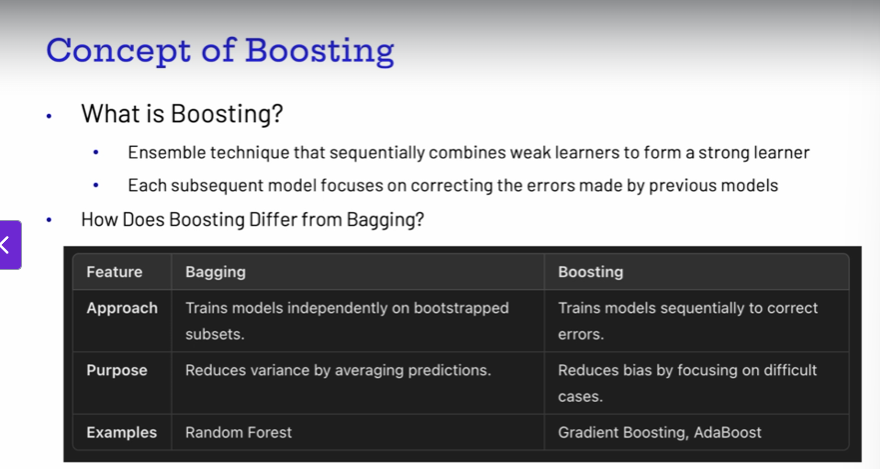
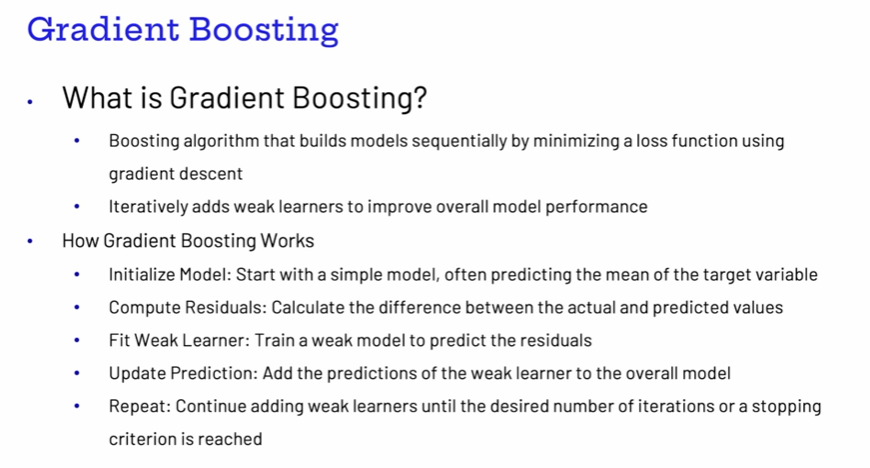
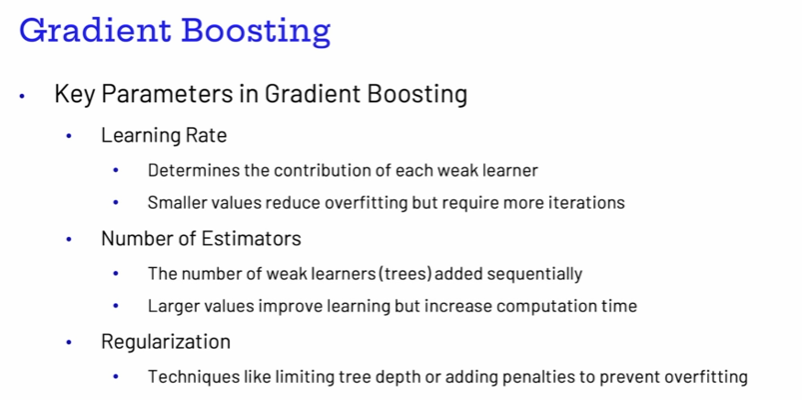
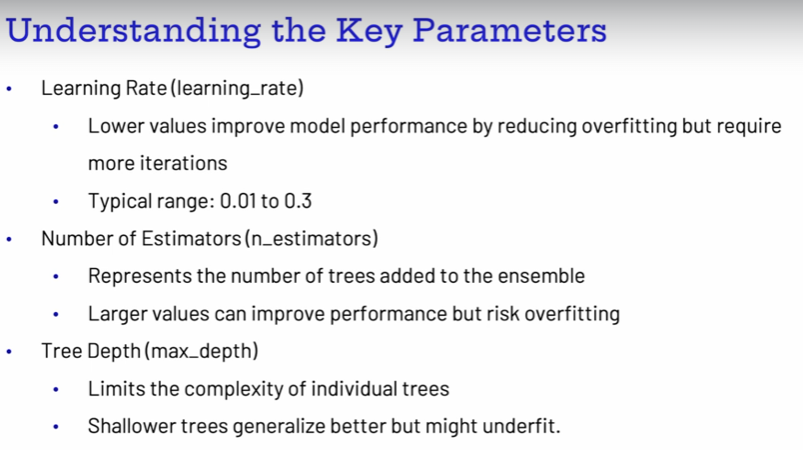



In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
data = load_breast_cancer()
x,y = data.data , data.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)


In [9]:
accuracy_score = accuracy_score(y_test,y_pred)
print(accuracy_score)
print(classification_report(y_test, y_pred))

0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [11]:
# define a hyperparameter grid 
param_grid ={
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[50, 100, 200],
    'max_depth':[3,5,7]
}

grid_search= GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy'    )

In [12]:
grid_search.fit(x_train,y_train)

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [13]:
# display best parameeter 
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [15]:
grid_search.best_score_

np.float64(0.9648351648351647)